In [1]:
# Most items in this notebook are defined in metadata.py around line 505
import os
import sys
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.


Setting environment for Precision WorkStation for Alex Newberry
{'MD589': 0.46, 'MD585': 0.46, 'UCSD001': 0.325, 'MD594': 0.46, 'DK17': 0.325}
Loaded data from saved metadata_cache for MD585
Loaded data from saved metadata_cache for MD589
Loaded data from saved metadata_cache for MD594


Folder for stack MD590 not found, skipping.
Folder for stack MD591 not found, skipping.
Folder for stack MD592 not found, skipping.
Folder for stack MD593 not found, skipping.
Folder for stack MD595 not found, skipping.
Folder for stack MD598 not found, skipping.
Folder for stack MD599 not found, skipping.
Folder for stack MD602 not found, skipping.
Folder for stack MD603 not found, skipping.
Folder for stack MD635 not found, skipping.
Folder for stack MD653 not found, skipping.
Folder for stack MD652 not found, skipping.
Folder for stack MD642 not found, skipping.
Folder for stack MD657 not found, skipping.
Folder for stack MD658 not found, skipping.
Folder for stack MD661 not found, skipping.
Folder for stack MD662 not found, skipping.
Folder for stack CHATM2 not found, skipping.
Folder for stack CHATM3 not found, skipping.


Loaded data from saved metadata_cache for UCSD001


# Window and Classifier Settings

In [34]:
windowing_settings

{1: {'patch_size': 224, 'spacing': 56},
 2: {'comment': 'larger margin', 'patch_size': 224, 'spacing': 56},
 3: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 32},
 4: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 128},
 5: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 64},
 6: {'comment': 'twice as large patch', 'patch_size': 448, 'spacing': 64},
 7: {'comment': 'specify size/spacing in terms of microns rather than pixels',
  'patch_size_um': 103.04,
  'spacing_um': 30},
 8: {'comment': 'larger patch', 'patch_size_um': 206.08, 'spacing_um': 30},
 9: {'comment': 'larger patch', 'patch_size_um': 412.16, 'spacing_um': 30},
 10: {'comment': 'larger patch', 'patch_size_um': 824.32, 'spacing_um': 30},
 11: {'comment': 'larger patch', 'patch_size_um': 51.52, 'spacing_um': 30},
 12: {'comment': 'larger patch', 'patch_size_um': 25.76, 'spacing_um': 30}}

In [35]:
classifier_settings

,model,margin_um,train_set_id,neg_composition,sample_weighting,input_img_version,svm_id,comment,num_samples_per_class
classifier_id,,,,,,,,,
30,lr,500,20/21,neg_has_all_surround,NaN,cropped_gray,30,NaN,NaN
31,lr,500,21/22,neg_has_all_surround,NaN,cropped_gray,31,NaN,NaN
32,lr,500,20/22,neg_has_all_surround,NaN,cropped_gray,32,NaN,NaN
33,gb1,500,20/21,neg_has_all_surround,NaN,cropped_gray,33,NaN,NaN
34,gb1,500,21/22,neg_has_all_surround,NaN,cropped_gray,34,NaN,NaN
35,gb1,500,20/22,neg_has_all_surround,NaN,cropped_gray,35,NaN,NaN
36,gb1,500,23/24,neg_has_all_surround,NaN,cropped_gray,36,NaN,NaN
37,lr,500,23/24,neg_has_all_surround,NaN,cropped_gray,37,NaN,NaN
38,lr,500,23/24/27/28,neg_has_surround_and_negative,NaN,cropped_gray,38,NaN,NaN


# Patch Locations

In [44]:
! ls /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD589/

MD589_annotation_contours_05302018164231.hdf
MD589_annotation_grid_indices.h5
MD589_annotation_structures_10312017220057.hdf
MD589_annotation_v3_09252016160841.h5
MD589_annotation_v3_09252016172320.h5
MD589_annotation_v3_09252016195300.h5
MD589_annotation_v3.h5


In [45]:
! ls /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD585/

MD585_annotation_contours_05302018161849.hdf
MD585_annotation_grid_indices.h5
MD585_annotation_v3.h5
MD585_annotation_win1_05302018161849_grid_indices_lookup.hdf
MD585_annotation_win12_05302018161849_grid_indices_lookup.hdf
MD585_annotation_win7_08012017212649_grid_indices_lookup.hdf


In [10]:
! aws s3 cp --recursive /home/alexn/Desktop/hand_annotated_patches/ s3://mousebrainatlas-data/hand_annotated_patches/

upload: ../../Desktop/hand_annotated_patches/MD585_patch_locations.json to s3://mousebrainatlas-data/hand_annotated_patches/MD585_patch_locations.json
upload: ../../Desktop/hand_annotated_patches/MD594_patch_locations.json to s3://mousebrainatlas-data/hand_annotated_patches/MD594_patch_locations.json
upload: ../../Desktop/hand_annotated_patches/MD589_patch_locations.json to s3://mousebrainatlas-data/hand_annotated_patches/MD589_patch_locations.json


In [46]:
! aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_labelings_v3/MD594/ \
    /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD594/

download: s3://mousebrainatlas-data/CSHL_labelings_v3/MD594/MD594_annotation_structures_11012017013215.hdf to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD594/MD594_annotation_structures_11012017013215.hdf
download: s3://mousebrainatlas-data/CSHL_labelings_v3/MD594/MD594_annotation_contours_05312018035134.hdf to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD594/MD594_annotation_contours_05312018035134.hdf
download: s3://mousebrainatlas-data/CSHL_labelings_v3/MD594/MD594_annotation_structuresHanddrawn_05312018043152.hdf to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD594/MD594_annotation_structuresHanddrawn_05312018043152.hdf


In [2]:
! aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/ \
    /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC18-2015.08.26-16.19.43_MD594_1_0052_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC18-2015.08.26-16.19.43_MD594_1_0052_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC16-2015.08.26-16.11.01_MD594_3_0048_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC16-2015.08.2

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC38-2015.08.26-17.30.18_MD594_2_0113_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC38-2015.08.26-17.30.18_MD594_2_0113_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC39-2015.08.26-17.34.24_MD594_1_0115_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC39-2015.08.2

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC53-2015.08.26-18.29.03_MD594_2_0158_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC53-2015.08.26-18.29.03_MD594_2_0158_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC52-2015.08.26-18.25.10_MD594_1_0154_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC52-2015.08.26-18.25.10_MD594_1_0154_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC52-2015.08.26-18.25.10_MD594_2_0155_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC52-2015.08.2

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC66-2015.08.26-19.18.59_MD594_2_0197_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC66-2015.08.26-19.18.59_MD594_2_0197_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC66-2015.08.26-19.18.59_MD594_1_0196_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC66-2015.08.26-19.18.59_MD594_1_0196_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC66-2015.08.26-19.18.59_MD594_3_0198_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC66-2015.08.2

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC76-2015.08.26-20.02.20_MD594_2_0227_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC76-2015.08.26-20.02.20_MD594_2_0227_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC75-2015.08.26-19.58.13_MD594_1_0223_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-IHC75-2015.08.2

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N28-2015.08.26-22.26.13_MD594_1_0082_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N28-2015.08.26-22.26.13_MD594_1_0082_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N26-2015.08.26-22.19.23_MD594_2_0077_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N26-2015.08.26-22.19.23_M

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N42-2015.08.26-23.18.56_MD594_1_0124_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N42-2015.08.26-23.18.56_MD594_1_0124_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N39-2015.08.26-23.07.15_MD594_2_0116_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N39-2015.08.26-23.07.15_MD594_2_0116_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N43-2015.08.26-23.22.56_MD594_1_0127_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N43-2015.08.26-23.22.56_M

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N57-2015.08.27-00.14.56_MD594_1_0169_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N57-2015.08.27-00.14.56_MD594_1_0169_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N60-2015.08.27-00.27.50_MD594_1_0178_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N60-2015.08.27-00.27.50_M

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N71-2015.08.27-01.14.30_MD594_2_0212_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N71-2015.08.27-01.14.30_MD594_2_0212_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N72-2015.08.27-01.18.48_MD594_2_0215_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N72-2015.08.27-01.18.48_MD594_2_0215_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N72-2015.08.27-01.18.48_MD594_1_0214_prep2_gray_win1_patchLocations.txt to ../../../../media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD594/MD594_prep2_gray_win1/MD594-N72-2015.08.27-01.18.48_M

In [ ]:
# MD585
# prep2_start, prep2_end = 105, 360
# X_OFFSET_PREP2_MD585 = -952
# Y_OFFSET_PREP2_MD585 = 448

# MD589
# prep2_start, prep2_end = 92, 370

# MD594
# prep2_start, prep2_end = 92, 364

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
import os
import time

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities_NOMXNET import *


win_id = 1
structure = 'IC'
stack = 'MD589'
# print filename_to_section['MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101']


paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', \
                     'SNC', 'SNR', '3N', '4N', 'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']

all_structures = paired_structures + singular_structures


# 1: {'patch_size': 224, 'spacing': 56}
patch_loc_root = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/'+stack+'/'+stack+'_prep2_gray_win1/'
# patch_loc_root = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD585/MD585_prep2_gray_win6/'
images_root = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/'+stack+'/'+stack+'_prep2_thumbnail/'

patch_fn_list = ! ls $patch_loc_root
image_fn_list = ! ls $images_root

filename_to_section, section_to_filename = DataManager.load_sorted_filenames( stack )



In [5]:
# Load Annotations to Grid Indices
for stack in [stack]:
    grid_index_class_lookup, latest_timestamp = \
    generate_annotation_to_grid_indices_lookup_v2(stack, win_id=win_id, by_human=True, 
                                                  stack_m='atlasV7',
                                                 suffix='contours', timestamp='latest',
                                                 surround_margins=[200, 500],
                                                return_timestamp=True)
    
    # Everything past here just saved results
    grid_index_class_lookup_fp = \
    DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=win_id, 
                                                               by_human=True, timestamp=latest_timestamp)
    print grid_index_class_lookup_fp

# Convert to x, y locations using 'all_locs'
all_locs = grid_parameters_to_sample_locations(win_id=win_id, stack=stack)

ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.


latest timestamp:  05312018031718


ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_cropbox.ini


Seems you are using operation INIs to provide cropbox.
ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.
Computing grid indices lookup for section 92...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_thumbnail_mask.png
Computing grid indices lookup for section 94...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep2_thumbnail_mask.png
Computing grid indices lookup for section 95...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_thumbnail_mask.png
Computing grid indices lookup for section 96...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N17-2015.07.30-17.07.32_MD589_2_00

Computing grid indices lookup for section 130...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep2_thumbnail_mask.png
Computing grid indices lookup for section 131...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep2_thumbnail_mask.png
Computing grid indices lookup for section 132...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep2_thumbnail_mask.png
Computing grid indices lookup for section 133...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep2_thumbnail_mask.png
Computing grid indices lookup for section 134...
Trying to load /media/alexn

Computing grid indices lookup for section 166...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_thumbnail_mask.png
Computing grid indices lookup for section 167...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep2_thumbnail_mask.png
Computing grid indices lookup for section 168...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep2_thumbnail_mask.png
Computing grid indices lookup for section 169...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep2_thumbnail_mask.png
Computing grid indices lookup for section 170...
Trying to load /media/alexn

Computing grid indices lookup for section 202...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_prep2_thumbnail_mask.png
Computing grid indices lookup for section 203...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_prep2_thumbnail_mask.png
Computing grid indices lookup for section 204...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_prep2_thumbnail_mask.png
Computing grid indices lookup for section 205...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_prep2_thumbnail_mask.png
Computing grid indices lookup for section 206...
Trying to load /media/alexn

Computing grid indices lookup for section 239...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_prep2_thumbnail_mask.png
Computing grid indices lookup for section 240...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_prep2_thumbnail_mask.png
Computing grid indices lookup for section 241...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_prep2_thumbnail_mask.png
Computing grid indices lookup for section 242...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_prep2_thumbnail_mask.png
Computing grid indices lookup for section 243...
Trying to load /media/alexn

Computing grid indices lookup for section 275...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_prep2_thumbnail_mask.png
Computing grid indices lookup for section 276...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_prep2_thumbnail_mask.png
Computing grid indices lookup for section 277...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_prep2_thumbnail_mask.png
Computing grid indices lookup for section 278...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_prep2_thumbnail_mask.png
Computing grid indices lookup for section 279...
Trying to load /media/alexn

Computing grid indices lookup for section 312...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_prep2_thumbnail_mask.png
Computing grid indices lookup for section 313...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_prep2_thumbnail_mask.png
Computing grid indices lookup for section 314...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_prep2_thumbnail_mask.png
Computing grid indices lookup for section 315...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_prep2_thumbnail_mask.png
Computing grid indices lookup for section 316...
Trying to load /media/alexn

Computing grid indices lookup for section 349...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_prep2_thumbnail_mask.png
Computing grid indices lookup for section 350...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_prep2_thumbnail_mask.png
Computing grid indices lookup for section 351...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_prep2_thumbnail_mask.png
Computing grid indices lookup for section 352...
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail_mask/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_prep2_thumbnail_mask.png
Computing grid indices lookup for section 353...
Trying to load /media/alexn

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD589/MD589_annotation_win1_05312018031718_grid_indices_lookup.hdf


In [6]:

all_patch_locations = {}

for structure in all_structures:
    all_patch_locations[structure] = {}
    
    valid_sections = []
    try:
        possibly_valid_sections = grid_index_class_lookup[structure].keys()
    except:
        print('SKIPPING: '+structure)
        continue
        
    # Make a list of all sections where patches actually exist
    for section in possibly_valid_sections:
        # If this table entry is a numpy array, then it is filled with data. Otherwise (float) it is 'nan'
        if isinstance(grid_index_class_lookup[structure][section], np.ndarray):
            valid_sections.append( section )
            
    for section in valid_sections:
        valid_patch_indices = grid_index_class_lookup[structure][ section ]
        patch_coors =  all_locs[ valid_patch_indices ].tolist()
        
        for index in range(len(patch_coors)):
            patch_coors[index][0] = patch_coors[index][0]
            patch_coors[index][1] = patch_coors[index][1]

        all_patch_locations[structure][int(section)] = patch_coors

In [9]:
with open('/home/alexn/Desktop/'+stack+'_patch_locations.json', 'w') as outfile:  
    json.dump( all_patch_locations, outfile)

MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_prep2_thumbnail.tif
MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_prep2_gray_win1_patchLocations.txt


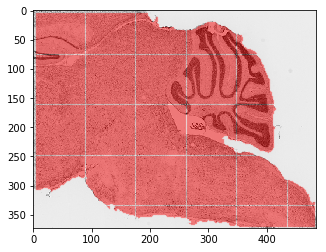

In [15]:
# Plots ALL Patch Locations
patch_fn_index = 50
image_fn_index = 50
x_pts = []
y_pts = []

print image_fn_list[image_fn_index]
print patch_fn_list[patch_fn_index]


with open(patch_loc_root+patch_fn_list[patch_fn_index], 'r') as patch_file:
    for i in range(50000):
        try:
            index, x, y = patch_file.readline().split(' ')
            x_pts.append( (float(x)/32) )
            y_pts.append( (float(y)/32) )
        except:
            continue
            
img = cv2.imread( images_root+image_fn_list[image_fn_index] , 2)
plt.imshow( img, cmap='gray')
plt.scatter(x_pts, y_pts, s=.1, c='red', alpha=0.5)

del x_pts
del y_pts

In [24]:
with open(patch_loc_root+patch_fn_list[patch_fn_index], 'r') as patch_file:
    for i in range(50):
        try:
            index, x, y = patch_file.readline().split(' ')
            print(x)
            print(y)
        except:
            continue

112
112

112
168

112
224

112
280

112
336

112
392

112
448

112
504

112
560

112
616

112
672

112
728

112
784

112
840

112
896

112
952

112
1008

112
1064

112
1120

112
1176

112
1232

112
1288

112
1344

112
1400

112
1456

112
1512

112
1568

112
1624

112
1680

112
1736

112
1792

112
1848

112
1904

112
1960

112
2016

112
2072

112
2128

112
2184

112
2240

112
2296

112
2352

112
2408

112
2464

112
2520

112
2576

112
2632

112
2688

112
2744

112
2800

112
2856



In [9]:
DataManager.get_cropbox_filename_v2(stack=stack, anchor_fn='FILENAME', prep_id=2)

'/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_cropbox.ini'

In [10]:
valid_sections = []

for section in grid_index_class_lookup[structure].keys():
    # If this table entry is a numpy array, then it is filled with data. Otherwise (float) it is 'nan'
    if isinstance(grid_index_class_lookup[structure][section], np.ndarray):
        valid_sections.append( section )

In [32]:
grid_index_class_lookup['IC'].keys()

Int64Index([ 92,  94,  95,  96,  97,  98,  99, 100, 101, 102,
            ...
            361, 362, 363, 364, 365, 366, 367, 368, 369, 370],
           dtype='int64', length=274)

93

203
Number of Positive Patches: 362
Number of Positive Patches: 1773


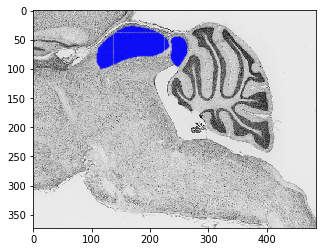

In [87]:
patch_fn_index = 55
image_fn = image_fn_list[patch_fn_index][0:image_fn_list[0].index('_prep2')]
image_section = metadata_cache['filenames_to_sections'][stack][image_fn]
print(image_section)



offsets = {'MD585':[952,-448],'MD589':[-1600,-250],'MD594':[0.0]}
x_offset = offsets[stack][0]
y_offset = offsets[stack][1]

img = cv2.imread( images_root+image_fn_list[patch_fn_index] , 2)
plt.imshow( img, cmap='gray')

for struct in ['IC','SC']:
    x_pts_str = []
    y_pts_str = []
    x_raw = []
    y_raw = []
    valid_patch_indices = grid_index_class_lookup[struct][ image_section ]
    print 'Number of Positive Patches:',len(valid_patch_indices)

    for x, y in all_locs[valid_patch_indices]:
#         x_raw.append( (float(x)) )
#         y_raw.append( (float(y)) )
        x_pts_str.append( (float(x)/32)+x_offset/32 )
        y_pts_str.append( (float(y)/32)+y_offset/32 )

    plt.scatter(x_pts_str, y_pts_str, s=1, c='blue', alpha=.5)

In [37]:
x_pts_str

[193.0,
 193.0,
 193.0,
 193.0,
 193.0,
 193.0,
 194.75,
 194.75,
 194.75,
 194.75,
 194.75,
 194.75,
 194.75,
 194.75,
 194.75,
 194.75,
 196.5,
 196.5,
 196.5,
 196.5,
 196.5,
 196.5,
 196.5,
 196.5,
 196.5,
 196.5,
 196.5,
 196.5,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 198.25,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 201.75,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 203.5,
 205.25,
 205.25,
 205.25,
 205.25,
 205.25,
 205.25,
 205.25,
 205.25,
 205.25,
 205.25,
 205.25,
 205.25,
 205.2

In [22]:
img = cv2.imread( raw_images_root+raw_image_fn_list[50] , 2)
index = 8
x = int( float( all_patch_locations['12N'][200][index][0] ) )
y = int( float( all_patch_locations['12N'][200][index][1] ) )

patch = img[y:y+224,x:x+224]


plt.imshow( patch, cmap='gray')

NameError: name 'raw_images_root' is not defined

In [14]:
! ls /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD594/

MD594_annotation_contours_05312018035134.hdf
MD594_annotation_structures_11012017013215.hdf
MD594_annotation_structuresHanddrawn_05312018043152.hdf


In [23]:
import pandas

fn_hd = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD594/MD594_annotation_structuresHanddrawn_05312018043152.hdf' # 6MB
fn_co = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD594/MD594_annotation_contours_05312018035134.hdf' # 5.7MB
fn_st = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_labelings_v3/MD594/MD594_annotation_structures_11012017013215.hdf' #  1.3MB

In [34]:
i_hd = pandas.read_hdf(fn_hd)

print i_hd.keys()
print i_hd['name'][0]

Index([u'edits', u'name', u'origin', u'resolution', u'side', u'volume'], dtype='object')
RMC


In [31]:
for item in i_hd:
    print item

edits
name
origin
resolution
side
volume


In [25]:
i_hd

,edits,name,origin,resolution,side,volume
109066512106773,[],RMC,"[1300, 526, 583]",8.0um,R,blpk�� ��        \n       JSON     D...
113058115045632,[],LC,"[1507, 466, 648]",8.0um,R,blpk�� ��        \n       JSON     E...
116837006160528,[],LC,"[1509, 459, 448]",8.0um,L,blpk�� ��        \n       JSON     E...
130558812337002,[],Sp5O,"[1579, 503, 748]",8.0um,R,blpk   `l        (       JSON     F ...
144876136029104,[],LRt,"[1799, 630, 398]",8.0um,L,blpk   @?               JSON     E ...
144979757486365,[],5N,"[1510, 536, 368]",8.0um,L,blpk؝ ؝        \n       JSON     D  ...
146768542392515,[],VLL,"[1427, 495, 323]",8.0um,L,blpk    ;                JSON     F ...
147231063283877,[],DC,"[1563, 437, 758]",8.0um,R,blpk   �               JSON     F ...
156871905186678,[],SNR,"[1251, 525, 633]",8.0um,R,blpk   ��        (       JSON     G ...
159287725634090,[],VLL,"[1399, 507, 711]",8.0um,R,blpk   ��                JSON     F ...


In [21]:
pandas.read_hdf(fn_co)

,class,creator,edits,filename,id,label_position,name,orientation,parent_structure,resolution,section,side,side_manually_assigned,time_created,type,vertices
100098703842774,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD594-N31-2015.08.26-22.36.37_MD594_2_0092,100098703842774,"[29026.14318983844, 12262.52302640697]",7N,sagittal,[],raw,157,L,False,09132016003307,intersected,"[[29650.618637495485, 12017.406525430648], [29..."
100222193324575,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'053...",MD594-IHC27-2015.08.26-16.50.00_MD594_1_0079,100222193324575,"[23868.554418553962, 5908.877880192551]",IC,sagittal,[],raw,140,S,False,05312018035045,intersected,"[[22997.10366748096, 6896.609010237711], [2292..."
100323818129629,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD594-IHC34-2015.08.26-17.14.47_MD594_2_0101,100323818129629,"[30201.211880183255, 11554.889241930965]",Amb,sagittal,[],raw,170,L,False,09162016175039,intersected,"[[30325.84819144081, 11718.622178020792], [301..."
100561495701915,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD594-N57-2015.08.27-00.14.56_MD594_1_0169,100561495701915,"[31124.289997545042, 12635.376805598267]",IO,sagittal,[],raw,257,R,False,09172016022609,intersected,"[[30507.946864897494, 12926.959138017837], [30..."
100681336662670,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD594-N23-2015.08.26-22.09.28_MD594_2_0068,100681336662670,"[25458.98105205914, 10692.131173800512]",Pr5,sagittal,[],raw,125,L,False,09162016165044,intersected,"[[24988.389887213805, 11338.470630546855], [24..."
100706575066990,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD594-N23-2015.08.26-22.09.28_MD594_1_0067,100706575066990,"[27389.69041010622, 8661.036866092985]",DC,sagittal,[],raw,123,L,False,09162016171824,intersected,"[[28042.728424036337, 9083.239726132098], [279..."
101092747676272,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD594-N31-2015.08.26-22.36.37_MD594_2_0092,101092747676272,"[25292.68963357841, 12373.447428051975]",VLL,sagittal,[],raw,157,L,False,09132016003440,intersected,"[[24748.297787697324, 12407.543436720336], [24..."
101253522604102,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'053...",MD594-N32-2015.08.26-22.40.16_MD594_2_0095,101253522604102,"[22886.875849146225, 7202.228649601671]",SC,sagittal,[],raw,161,S,False,05312018033953,intersected,"[[22567.167652194737, 8619.322615187713], [224..."
101441043042110,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD594-N65-2015.08.27-00.47.47_MD594_2_0194,101441043042110,"[20063.180399689405, 13944.454622456342]",VLL,sagittal,[],raw,291,R,False,09172016023833,intersected,"[[20507.67463556901, 14990.85544327056], [2036..."
101471955801140,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'091...",MD594-N44-2015.08.26-23.26.52_MD594_2_0131,101471955801140,"[24918.430667142504, 12693.141079564874]",RtTg,sagittal,[],raw,209,S,False,09162016182003,intersected,"[[25266.03989794646, 13430.038124466919], [251..."
